In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

8

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction
import time
import sys
from concurrent.futures import ProcessPoolExecutor
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax import jacfwd, jacrev
from numpy.linalg import inv

In [21]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from fractions import Fraction

# g=9.8, l=1.0, m₁=10.0, m₂=1.0
# stateSpaceBox =[theta1,velocity1,theta2,velocity2]
# stateSpaceBox = [0 2pi;      -8 +8; 0 +2pi;        -8 8]
dyn = {"g":9.8, "m2": 1.0, "l": 1.0, "m1": 1.0}

v1 = np.array([1, 0, 0, 0], dtype=np.float32)
v2 = np.array([0, 1, 0, 0], dtype=np.float32)
v3 = np.array([0, 0, 1, 0], dtype=np.float32)
v4 = np.array([0, 0, 0, 1], dtype=np.float32)
x_dot = []
x_norm = []

# def cosin

def double_pendulum (x0, dyn):
    g = dyn['g']
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    #print (x0)
    f = np.array([x0[1],
                  ((-(1.25 + 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2]))) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 0.5*(x0[3]**2)*np.sin(x0[2]) + np.sin(x0[2])*x0[1]*x0[3] - 4.9*np.cos(x0[0] + x0[2]) - 14.7*np.cos(x0[0])) / (3.5 + np.cos(x0[2])),
                  x0[3],
                  (((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))
                 ], dtype=np.float32)


    # g = np.array([0,
    #               (-1.25 - 0.5*np.cos(x0[2])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))*(3.5 + np.cos(x0[2]))),
    #               0,
    #               1 / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))
    #              ], dtype=np.float32)
    # return f + g*0
    return f

def linearized_double_pendulum (identity, dyn, x0):
    g = dyn['g']
    l = dyn['l']
    m1 = dyn['m1']
    m2 = dyn['m2']
    led_double_pendulum = np.array([[0, 1, 0, 0],
                             [(((-1.25 - 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 14.7*np.sin(x0[0]))) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2]))) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 4.9*np.sin(x0[0] + x0[2]) + 14.7*np.sin(x0[0])) / (3.5 + np.cos(x0[2])),
                              (((-1.25 - 0.5*np.cos(x0[2]))*((-(1.25 + 0.5*np.cos(x0[2]))*np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2])) - np.sin(x0[2])*x0[1])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2])),
                              (((-1.25 - 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 0.5*(x0[3]**2)*np.cos(x0[2]) - np.cos(x0[2])*x0[1]*x0[3]) - 0.5*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])*np.sin(x0[2])) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2]) + (((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) - 0.5*(x0[1]**2)*np.cos(x0[2])) - 0.5*((-(1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) + 4.9*np.cos(x0[0] + x0[2]) + 0.5*(x0[1]**2)*np.sin(x0[2]))*np.sin(x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 4.9*np.sin(x0[0] + x0[2]) + 0.5*(x0[3]**2)*np.cos(x0[2]) + np.cos(x0[2])*x0[1]*x0[3] - (((-((1.25 + 0.5*np.cos(x0[2]))**2)) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) + (0.5*(2.5 + np.cos(x0[2]))*np.sin(x0[2])) / (3.5 + np.cos(x0[2])))*((-(1.25 + 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2]))) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))**2))) / (3.5 + np.cos(x0[2])) + (((-(1.25 + 0.5*np.cos(x0[2]))*(((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2]))) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) + 0.5*(x0[3]**2)*np.sin(x0[2]) + np.sin(x0[2])*x0[1]*x0[3] - 4.9*np.cos(x0[0] + x0[2]) - 14.7*np.cos(x0[0])) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]),
                              (((-1.25 - 0.5*np.cos(x0[2]))*(1.25 + 0.5*np.cos(x0[2]))*(-np.sin(x0[2])*x0[1] - np.sin(x0[2])*x0[3])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))*(3.5 + np.cos(x0[2]))) + np.sin(x0[2])*x0[1] + np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2]))],
                                    [0, 0, 0, 1],
                             [(((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 14.7*np.sin(x0[0]))) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))),
                              ((-(1.25 + 0.5*np.cos(x0[2]))*np.sin(x0[2])*x0[3]) / (3.5 + np.cos(x0[2])) - np.sin(x0[2])*x0[1]) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))),
                              (((1.25 + 0.5*np.cos(x0[2]))*(-4.9*np.sin(x0[0] + x0[2]) - 0.5*(x0[3]**2)*np.cos(x0[2]) - np.cos(x0[2])*x0[1]*x0[3]) - 0.5*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])*np.sin(x0[2])) / (3.5 + np.cos(x0[2])) + 4.9*np.sin(x0[0] + x0[2]) + (((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) - 0.5*(x0[1]**2)*np.cos(x0[2])) / (1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2]))) - ((((1.25 + 0.5*np.cos(x0[2]))*(4.9*np.cos(x0[0] + x0[2]) + 14.7*np.cos(x0[0]) - 0.5*(x0[3]**2)*np.sin(x0[2]) - np.sin(x0[2])*x0[1]*x0[3])) / (3.5 + np.cos(x0[2])) - 4.9*np.cos(x0[0] + x0[2]) - 0.5*(x0[1]**2)*np.sin(x0[2])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))**2))*(((-((1.25 + 0.5*np.cos(x0[2]))**2)) / ((3.5 + np.cos(x0[2]))**2))*np.sin(x0[2]) + (0.5*(2.5 + np.cos(x0[2]))*np.sin(x0[2])) / (3.5 + np.cos(x0[2]))),
                              ((1.25 + 0.5*np.cos(x0[2]))*(-np.sin(x0[2])*x0[1] - np.sin(x0[2])*x0[3])) / ((1.25 + (-((1.25 + 0.5*np.cos(x0[2]))**2)) / (3.5 + np.cos(x0[2])))*(3.5 + np.cos(x0[2])))]
                                   ], dtype=np.float32)
    pre_dot = np.dot(led_double_pendulum, identity)
    return pre_dot


def RungeKutta (dyn, f, dt, x0):
    k1 = f(x0, dyn) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn)
    k3 = f(x0 + 0.5*k2*dt, dyn)
    k4 = f(x0 + k3*dt, dyn)

    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) *dt
    return x

def RungeKutta_linearized (dyn, f, dt, x0, y):
    k1 = f(x0, dyn, y) #[x,y,z]*0.1 example
    k2 = f(x0+0.5*k1*dt,dyn, y)
    k3 = f(x0 + 0.5*k2*dt, dyn, y)
    k4 = f(x0 + k3*dt, dyn, y)

    x = x0 + ((k1 + 2*k2 + 2*k3 + k4)/6) * dt

    return x


def f_t (dyn, f, linearized_f, dt, x0, T):
    x = np.empty(shape=(len(x0),T), dtype=np.float32)
    v1_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v2_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v3_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    v4_prime = np.empty(shape=(len(x0),T), dtype=np.float32)
    x[:, 0] = x0
    v1_prime[:, 0] = v1
    v2_prime[:, 0] = v2
    v3_prime[:, 0] = v3
    v4_prime[:, 0] = v4
    le = np.array([0,0,0,0], dtype=np.float32)
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])

        v1_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v1_prime[:, i-1], x[:, i-1])
        v2_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v2_prime[:, i-1], x[:, i-1])
        v3_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v3_prime[:, i-1], x[:, i-1])
        v4_prime[:, i] = RungeKutta_linearized(dyn, linearized_f, dt, v4_prime[:, i-1], x[:, i-1])

#         print (v4_prime[:, i])
#         input()
        norm1 = np.linalg.norm(v1_prime[:, i])
        v1_prime[:, i] = v1_prime[:, i]/norm1

        GSC1 = np.dot(v2_prime[:, i], v1_prime[:, i])

        v2_prime[:, i] = v2_prime[:, i] - GSC1*v1_prime[:, i]
        norm2 = np.linalg.norm(v2_prime[:, i])
        v2_prime[:, i] = v2_prime[:, i]/norm2

        GSC2 = np.dot(v3_prime[:, i], v1_prime[:, i])
        GSC3 = np.dot(v3_prime[:, i], v2_prime[:, i])

        v3_prime[:, i] = v3_prime[:, i] - GSC2*v1_prime[:, i] - GSC3*v2_prime[:, i]
        norm3 = np.linalg.norm(v3_prime[:, i])
        v3_prime[:, i] = v3_prime[:, i]/norm3

        GSC4 = np.dot(v4_prime[:, i], v1_prime[:, i])
        GSC5 = np.dot(v4_prime[:, i], v2_prime[:, i])
        GSC6 = np.dot(v4_prime[:, i], v3_prime[:, i])

        v4_prime[:, i] = v4_prime[:, i] - GSC4*v1_prime[:, i] - GSC5*v2_prime[:, i] - GSC6*v3_prime[:, i]
        norm4 = np.linalg.norm(v4_prime[:, i])

        v4_prime[:, i] = v4_prime[:, i]/norm4

        le = le + np.log2(np.array([norm1,norm2,norm3,norm4]))
#         if ( i % 100 == 0 ):
#             print ('log2:', np.log2(np.array([norm1,norm2,norm3]))/(i*dt))
#             print ('cum:', cum/(i*dt))


    return x, le/(T*dt)


In [ ]:
-3.141078184727167+np.pi/2

-1.5702818579322706

In [6]:
x0 = np.array([ 3.1404978341333045-np.pi/2,  0 , 0.010102942221729253, 0 ])

In [22]:
x0 = np.array([ np.pi/2,  0 , 0, 0 ])

In [ ]:
x0 = np.array([ -1.94168250e-01,  -2.19026514e+00 , -3.36607716e+01, -1.11430499e+00])

In [23]:
x, le = f_t(dyn, double_pendulum, linearized_double_pendulum, 0.01, x0, 300)

In [24]:
le

array([ 4.3359513,  1.8539491, -1.8921862, -4.297711 ], dtype=float32)

In [ ]:
sum(le[le>0])

5.074518799781799

In [ ]:
sum(le[le>0])

5.074518799781799

In [ ]:
-np.pi/2

-1.5707963267948966

In [ ]:
T = np.linspace(300,1000, 8)

In [ ]:
dt = np.linspace(0.001,0.1, 9)

In [ ]:
k = np.array(np.meshgrid(T,dt))

In [ ]:
k.T.shape

(8, 9, 2)

In [ ]:
k.shape

(8, 9, 2)

In [ ]:
data = []
k = k.T
for i in range(k.shape[0]):
  for j in range(k.shape[1]):
    # print (k[i][j])
    _, le = f_t(dyn, double_pendulum, linearized_double_pendulum,k[i][j][1], np.array([ np.pi/2,  0 , 0, 0 ]), int(k[i][j][0]))
    data.append([le,k[i][j]])

In [ ]:
data

[[array([ 5.226791 , -1.8891417,  1.4752876, -4.812937 ], dtype=float32),
  array([3.e+02, 1.e-03])],
 [array([ 4.269162 ,  2.063587 , -2.0912492, -4.241498 ], dtype=float32),
  array([3.0000e+02, 1.3375e-02])],
 [array([ 3.878152 ,  2.4114907, -2.362564 , -3.9285233], dtype=float32),
  array([3.000e+02, 2.575e-02])],
 [array([ 2.681298 ,  1.5629731, -1.5697821, -2.6831143], dtype=float32),
  array([3.0000e+02, 3.8125e-02])],
 [array([ 1.9461044,  1.327297 , -1.3201269, -1.9617964], dtype=float32),
  array([3.00e+02, 5.05e-02])],
 [array([ 1.5181714,  1.1366794, -1.0398859, -1.6165775], dtype=float32),
  array([3.0000e+02, 6.2875e-02])],
 [array([ 1.6058123 ,  0.98730874, -1.0214233 , -1.5764468 ], dtype=float32),
  array([3.000e+02, 7.525e-02])],
 [array([ 1.4123085 ,  0.9252752 , -0.94270176, -1.395135  ], dtype=float32),
  array([3.0000e+02, 8.7625e-02])],
 [array([ 1.1158187,  0.8243338, -0.8016843, -1.1386471], dtype=float32),
  array([3.e+02, 1.e-01])],
 [array([ 5.189145 , -1.38

Text(0.5, 0.98, 'Double pendulum theta1=0, theta2=0, v=0')

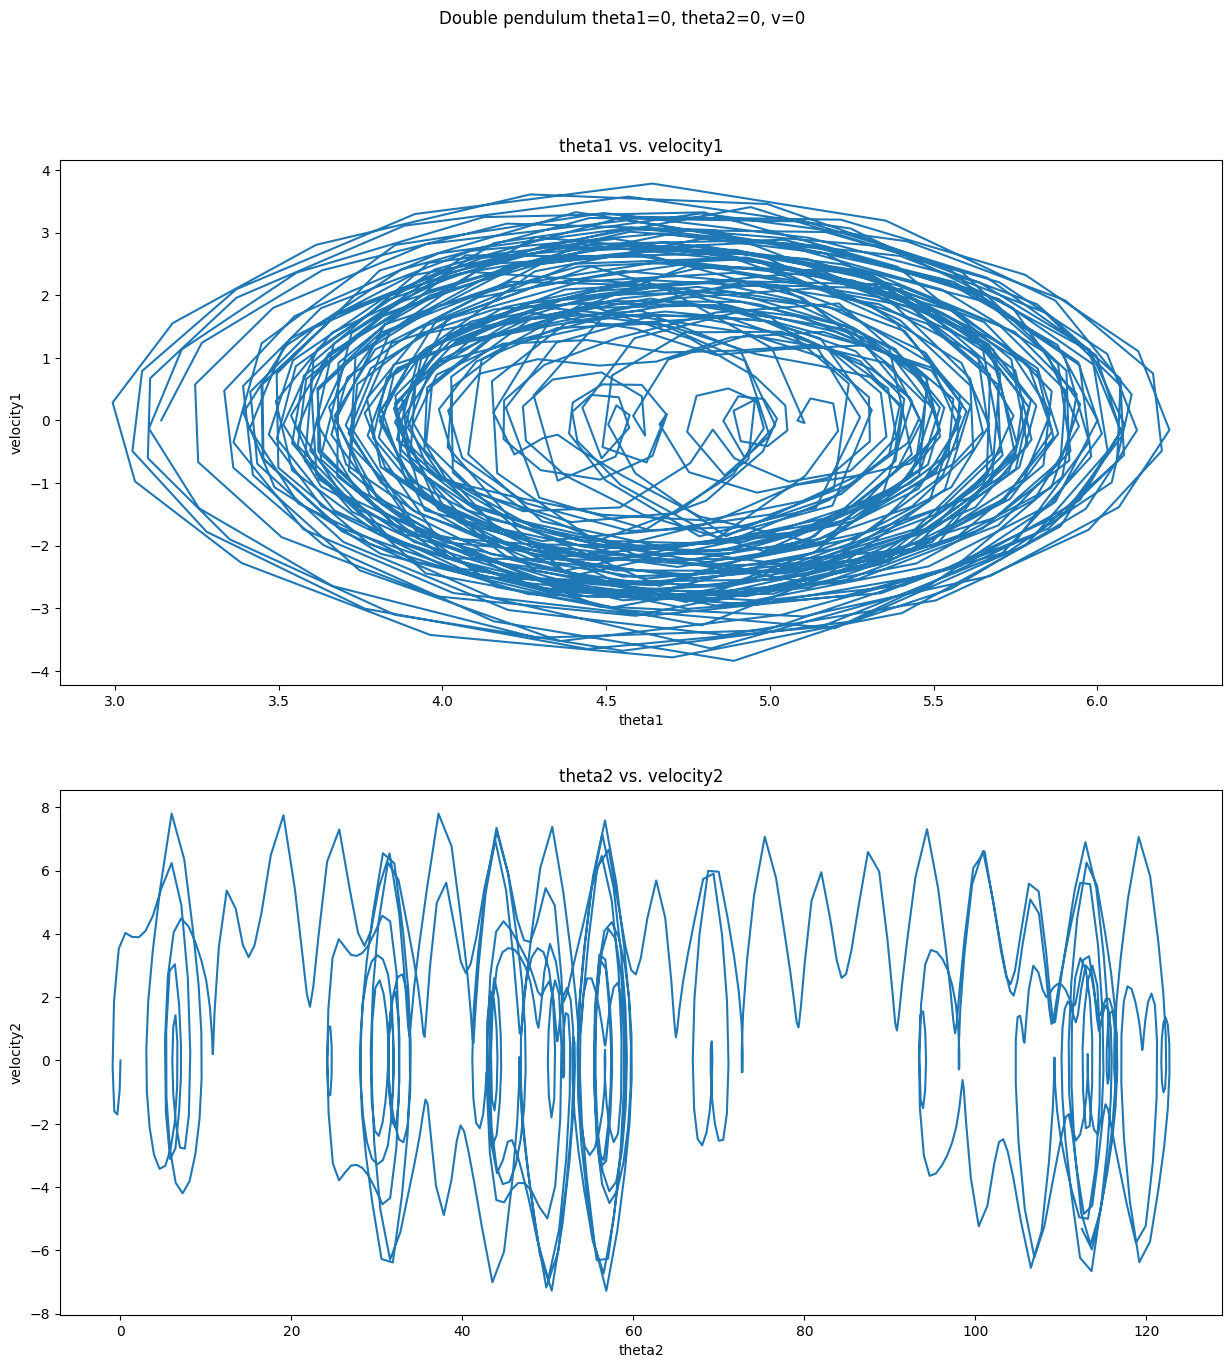

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211)
ax.set_title('theta1 vs. velocity1')
ax.set_xlabel('theta1')
ax.set_ylabel('velocity1')
plot = ax.plot(x[0],x[1])

ax1 = fig.add_subplot(212)
ax1.set_title('theta2 vs. velocity2')
ax1.set_xlabel('theta2')
ax1.set_ylabel('velocity2')
plot = ax1.plot(x[2],x[3])

fig.suptitle('Double pendulum theta1=0, theta2=0, v=0')

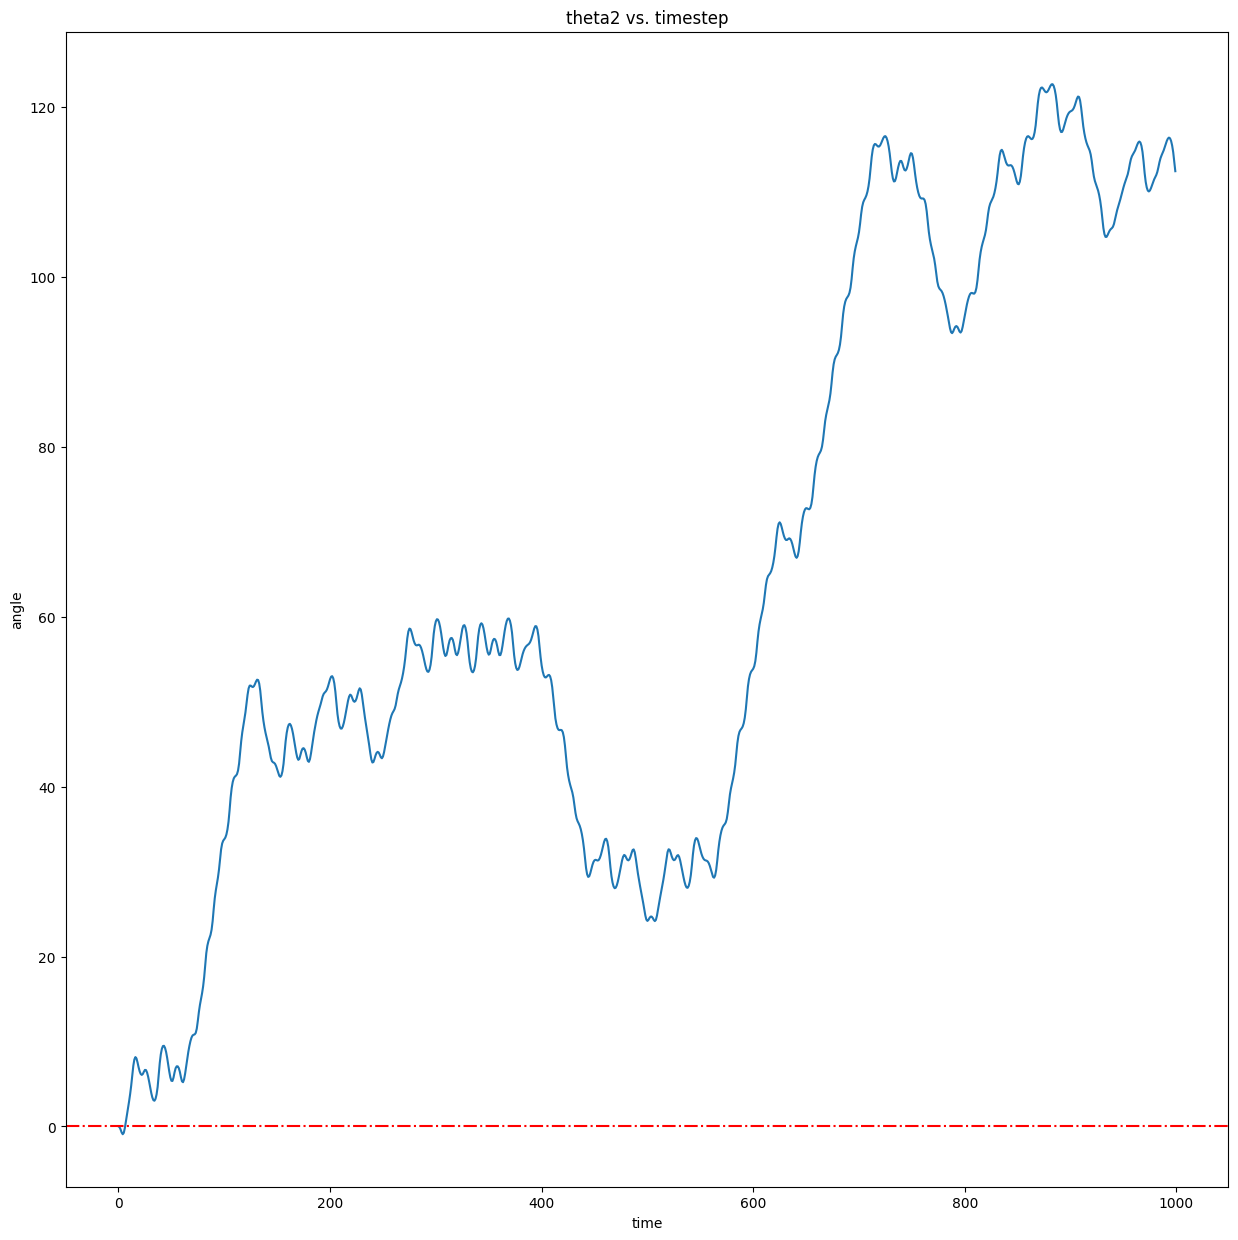

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
ax1.set_title('theta2 vs. timestep')
ax1.set_xlabel('time')
ax1.set_ylabel('angle')
ax1.plot(np.array(list(range(len(x[2])))), x[2])
ax1.axhline(y = 0, color = 'r', linestyle = 'dashdot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# X = np.array(np.meshgrid(np.arange(-2 , 7, 0.2),
#                       np.arange(-30 , 1, 0.2),
#                          np.arange(0 , 30, 0.2)
#                       ))

# X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2],3)
# # new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
# cum_list = []
# points = list(X_reshaped)
# for i in X_reshaped:
#     print (cal_le (i), i)

In [ ]:
X.T.shape[2]

400

In [ ]:
X.T.shape[3]

3

In [ ]:
X.T.shape

(400, 120, 400, 3)

In [ ]:
X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2],3)

array([], shape=(0, 3), dtype=float64)

In [ ]:
fp1

array([  9.9969991 , -66.64666066,  66.64666066])

In [ ]:
def cal_le (x):
    _, le = f_t(dyn, double_pendulum, linearized_double_pendulum, 0.01, x, 500)
    return le

In [ ]:
#np.pi/2, 0.1
# l2x = np.arange(0-0.01 , 0+0.01)
# l2y = np.arange(0-0.01 ,  0+0.01)
# l1x = np.arange(np.pi/2-0.1 ,  np.pi/2+0.1)
# l1y = np.arange(0-0.01 ,  0+0.01)
# X = np.array(np.meshgrid(np.pi/2,0,l2x,l2y))
l2x = np.linspace(0-0.01 , 0+0.01, 20)
l2y = np.linspace(0-0.01 ,  0+0.01, 20)
l1x = np.linspace(np.pi/2-0.1 ,  np.pi/2+0.1, 20)
l1y = np.linspace(0-0.01 ,  0+0.01,20)
X = np.array(np.meshgrid(l1x,l1y,l2x,l2y))


X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1]*X.T.shape[2]*X.T.shape[3],4)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
le_list = []
points = list(X_reshaped)
with ProcessPoolExecutor(max_workers=8) as executor:
    for r in executor.map(cal_le, points, chunksize=10):
        # print (r)
        le_list.append(r)
zs = np.array(le_list)

np.save('/content/drive/MyDrive/HW2/precal_dp_0913', zs)
np.save('/content/drive/MyDrive/HW2/precal_dp_points_0913', X_reshaped)

In [ ]:
np.isnan(zs).any()

False

In [ ]:
X_reshaped

array([[ 1.57079633,  0.        ,  1.04719755, -2.        ],
       [ 1.57079633,  0.        ,  1.14719755, -2.        ],
       [ 1.57079633,  0.        ,  1.24719755, -2.        ],
       ...,
       [ 1.57079633,  0.        ,  1.84719755,  1.9       ],
       [ 1.57079633,  0.        ,  1.94719755,  1.9       ],
       [ 1.57079633,  0.        ,  2.04719755,  1.9       ]])

In [ ]:
zs[np.argmax(zs[:,0])]

NameError: ignored

In [ ]:
np.sort(zs[:,0])

array([0.6499566, 0.8683996, 0.9490123, 1.0103381, 1.0564244, 1.0689304,
       1.1096492, 1.1202631, 1.1281103, 1.1334852, 1.1728163, 1.197633 ,
       1.2055485, 1.2072626, 1.2142524, 1.2285521, 1.2311049, 1.2566034,
       1.2702627, 1.277124 , 1.2877649, 1.3092102, 1.3129028, 1.3229182,
       1.3385766, 1.3611073, 1.3634362, 1.3635443, 1.3751848, 1.3805875,
       1.3825791, 1.4010531, 1.4014257, 1.409898 , 1.4155941, 1.4237816,
       1.4421421, 1.4627483, 1.4641628, 1.4691604, 1.4696572, 1.4721525,
       1.4761723, 1.4764282, 1.4792529, 1.4829099, 1.4887413, 1.494349 ,
       1.5197294, 1.5234178, 1.5236521, 1.5402067, 1.5495789, 1.5502427,
       1.5511537, 1.5614625, 1.563978 , 1.570853 , 1.5714625, 1.5717587,
       1.5800897, 1.5805488, 1.5813034, 1.5869039, 1.5943921, 1.5978616,
       1.6039886, 1.6066303, 1.6158915, 1.6246793, 1.628596 , 1.6290802,
       1.6339562, 1.6389301, 1.6405665, 1.6500819, 1.652125 , 1.6529882,
       1.6578106, 1.6636156, 1.6730232, 1.6824005, 

In [ ]:
X_reshaped[np.argmax(zs[:,0])]

array([1.57079633, 0.        , 1.04719755, 0.9       ])

In [ ]:
np.pi/2

1.5707963267948966

In [ ]:
X_reshaped

array([[ 1.57079633,  0.        , -0.42920367, -2.        ],
       [ 1.57079633,  0.        , -0.32920367, -2.        ],
       [ 1.57079633,  0.        , -0.22920367, -2.        ],
       ...,
       [ 1.57079633,  0.        ,  3.27079633,  1.9       ],
       [ 1.57079633,  0.        ,  3.37079633,  1.9       ],
       [ 1.57079633,  0.        ,  3.47079633,  1.9       ]])

Text(0.5, 1.0, 'le of rossler, at T=500, +- 2 around fp1')

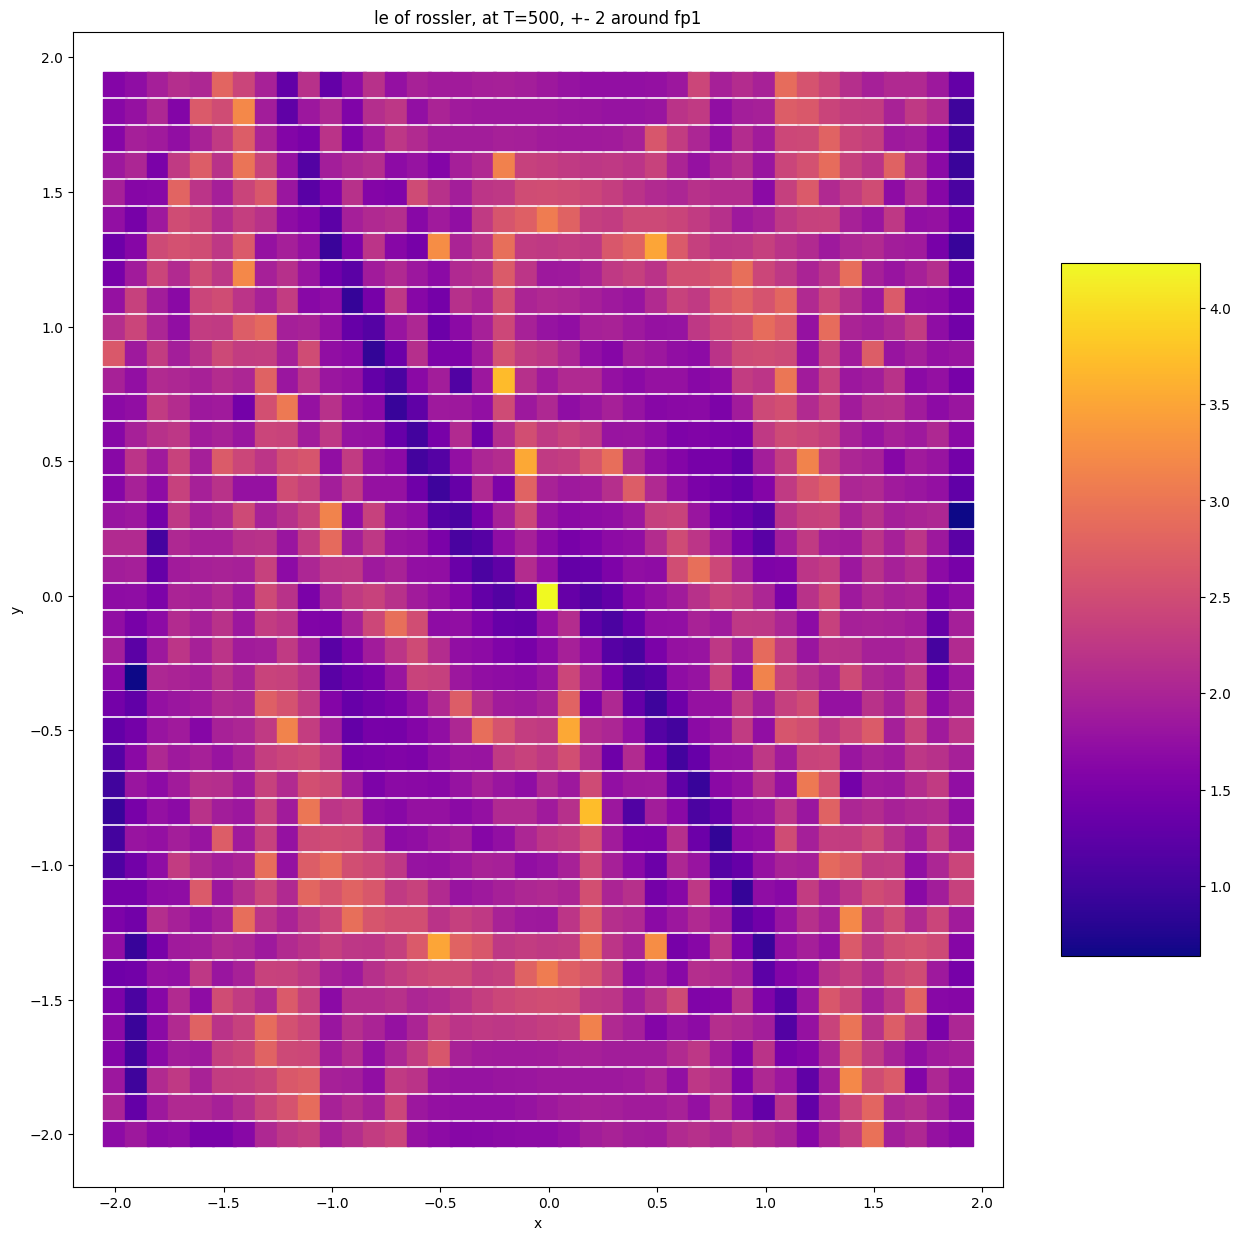

In [ ]:
zs = np.load('/content/drive/MyDrive/HW2/precal_dp.npy')
X_reshaped = np.load('/content/drive/MyDrive/HW2/precal_dp_points.npy')

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[2], X_reshaped.T[3],c=zs[:,0], cmap=plt.cm.plasma, s=300, marker="s")

cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
# ax.scatter( fp1[0], fp1[1], s=100, c='green', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title ('le of rossler, at T=500, +- 2 around fp1')

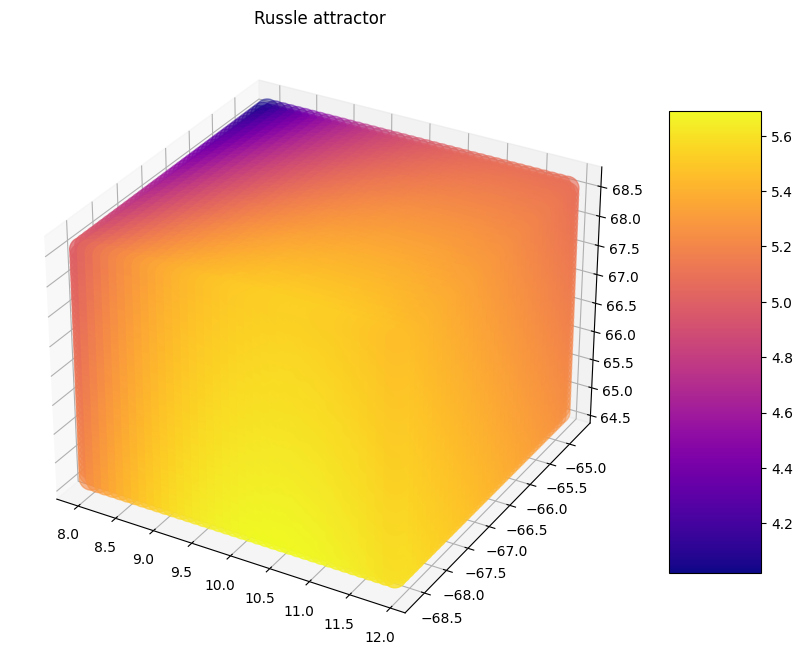

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
# ax.plot3D(v[0], v[1], v[2])
plot = ax.scatter3D( X_reshaped.T[0],X_reshaped.T[1],X_reshaped.T[2], c=zs[:,0], cmap=plt.cm.plasma, s=300)
cbar1 = fig.colorbar(plot, shrink=0.6, aspect=5)
# ax.scatter3D(  0.0070262,  -0.03513102,  0.03513102 , s=100, c='red', marker='o')
# ax.scatter(  0,  0,  0 , s=100, c='red', marker='o')
# [ 0.0070262  -0.03513102  0.03513102]
plt.title('Russle attractor')
plt.draw()

In [ ]:
def sample_based_truncated_le (x, evolv, dt, scalmx, scalmn):
    IND = 0
    SUM = 0.0
    ITS = 0
    IND2 = 0

    DI = np.inf #any large number

    NPT = len(x.T)
    DIM = len(x)
    DT = dt
    SCALMX = scalmx
    SCALMN = scalmn
#     EVOLV = 5 #time from t0 to t1
#     EVOLV_physical = EVOLV/DT

    EVOLV = evolv
    EVOLV_physical = evolv*DT
    #find nearest neighbor to the first data point
    Z = x.T

    for i in range(1, int(NPT)-(EVOLV)):
        D = 0.0
        #iterate through the array, compare first point with the rest
        D = np.linalg.norm(Z[IND] - Z[i])
        if ((D<DI) and (D>=SCALMN)):

            DI = D
            IND2 = i

    SUM_list = []
    while ((IND + EVOLV < NPT) and (IND2 + EVOLV < NPT)): #40
        PT1 = Z[IND+EVOLV]
        PT2 = Z[IND2+EVOLV]
        DF = np.linalg.norm(PT1 - PT2)
        ITS = ITS + 1
        SUM_list.append(SUM)
        SUM = SUM + np.log2(DF/DI) / EVOLV_physical
        ZLYAP = SUM/ITS

        INDOLD = IND2
        ZMULT = 1.0
        ANGLMX = 0.3
        THMIN = 3.14
        while (True): #70

            for i in range (int(NPT)): #100
                III = int(np.absolute(i-(IND+EVOLV)))
                if (III >= 10):
                    #find angular change old to new vector
                    DNEW = 0.0
                    DNEW = np.linalg.norm(PT1 - Z[i])
                    if ((DNEW <= ZMULT*SCALMX) and (DNEW >= SCALMN)):
                        DOT = 0.0
                        DOT = np.dot((PT1 - Z[i]),(PT1 - PT2))
                        CTH = np.absolute(DOT/(DNEW*DF))
                        #print(CTH)
                        if (CTH > 1.0):
                            CTH = 1.0
                        TH = np.arccos(CTH)
                        #save smallest angular change so far
                        if TH <= THMIN:
                            THMIN = TH
                            DII = DNEW
                            IND2 = i
            if (THMIN < ANGLMX):
                #print ("here")
                break
            # look at longer distance if cant find replacement
            ZMULT = ZMULT + 1
            if (ZMULT > 5):
                #no replacement at 5*scale, double search angle, reset distance
                ZMULT = 1.0
                ANGLMX = 2.0*ANGLMX
            if (ANGLMX >= 3.14):
                IND2 = INDOLD + EVOLV
                DII = DF
        IND = IND + EVOLV
        if (IND > NPT):
            print('here')
            break
#         print ("IND, IND2, NPT", IND, IND2, NPT)
        DI = DII

    return ZLYAP

In [ ]:
T = 500
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.1),
                      np.arange(-10 , 10, 0.1)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
for i in X_reshaped:
    x = f_t(dyn_pendulum, simple_pendulum, 0.001, i, T)
    cum_list.append(sample_based_truncated_le (x,100,0.001,10,1e-17))

zs = np.array(cum_list)

In [ ]:
T = 500
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.2),
                      np.arange(-8 , 8, 0.2)))

X_reshaped = X.T.reshape(X.T.shape[0]*X.T.shape[1],2)
# new_test_sin = np.array([np.sin(X_reshaped.T[0]),X_reshaped.T[1]])
cum_list = []
points = list(X_reshaped)

f = open("precal_sample_pen.txt", "w")
with ProcessPoolExecutor(max_workers=6) as executor:
    for r in executor.map(cal_le, points, chunksize=10):
        f.write(',' + str(r))
        cum_list.append()
f.close()

zs = np.array(cum_list)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
X = np.array(np.meshgrid(np.arange(0 , 2*np.pi, 0.1),
                      np.arange(-10 , 10, 0.1)))

NameError: name 'np' is not defined

ValueError: ignored

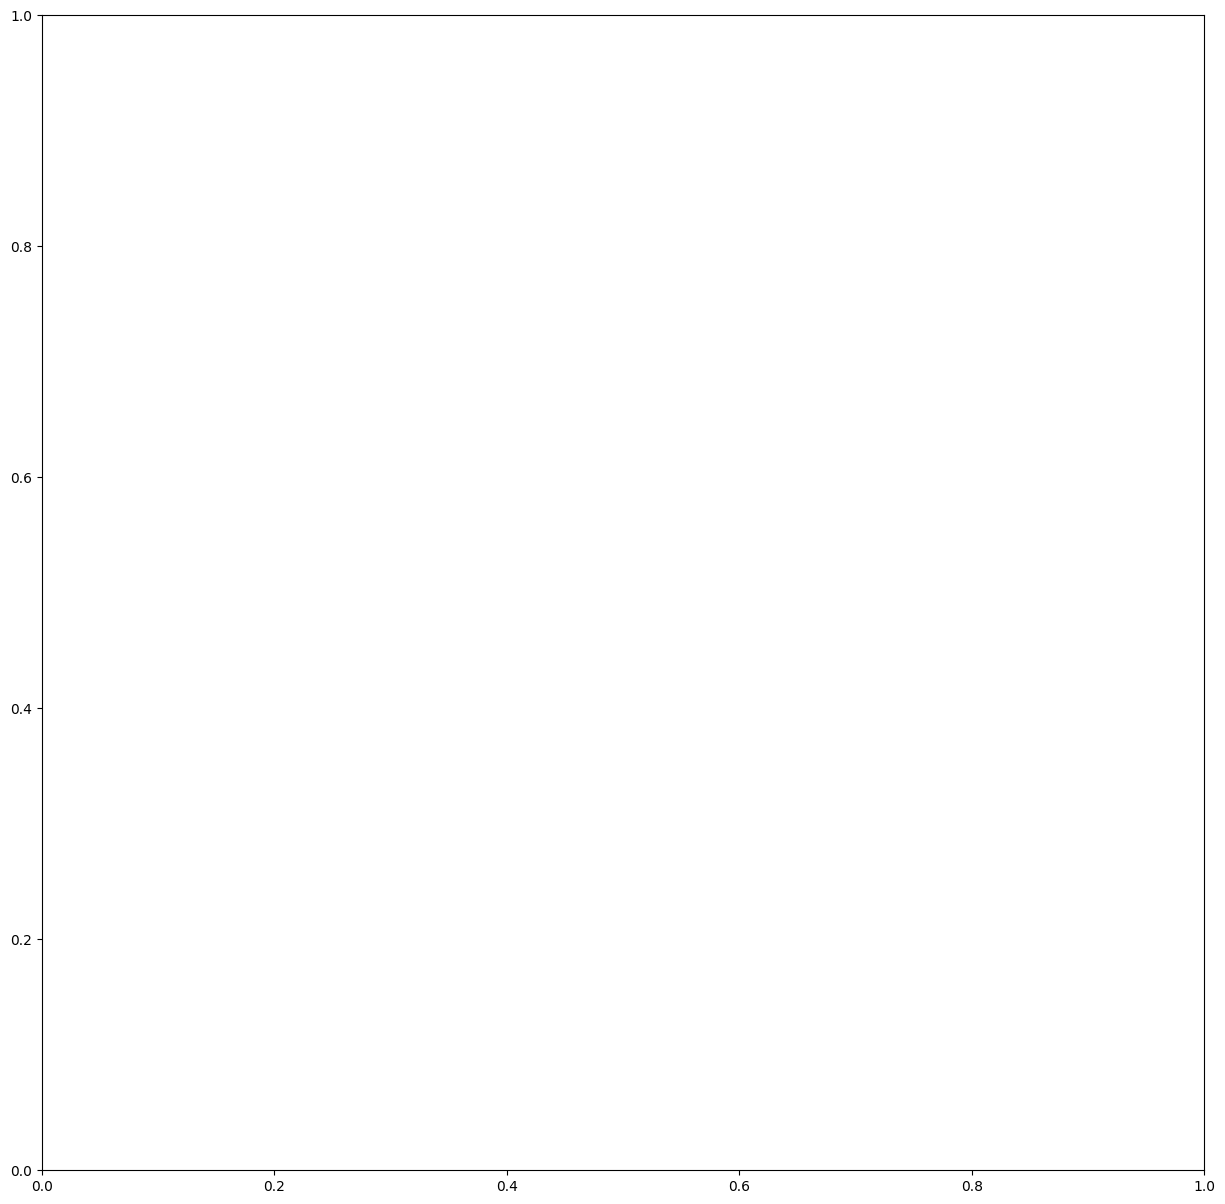

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

plot1 = ax.scatter(X_reshaped.T[0], X_reshaped.T[1],
                   c=zs, cmap=plt.cm.plasma,vmin=zs.min(), vmax=zs.max(), s=500, marker="s")
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
ax.set_xlabel('angle from the lowest point')
ax.set_ylabel('angular velocity')
plt.title ('le of simple pendulum, at T={}, +- [0,2pi] angle from the lowest point and +- 8 angular velocity'.format(T))

In [ ]:
np.save('pendulum_sample_01_500', zs)
np.save('pendulum_points_01_500', X_reshaped)

NameError: ignored

In [ ]:
X.shape

(2, 200, 63)

In [ ]:
# non linear pattern, before it seems like a straight line
# limit velocity, clip velocity
# need to exent the plot above to see if theres non-linear pattern
# global max